# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 382626661
sectors = np.array([10,11,12])

period = 17.6146427422
tdepth = 0.0005993900054552719

lc_file = "TOI_283_S10_11_12.csv"
contrastcurve_file = "TOI_283_562nm.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_5584\2164005778.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap10, ap11, ap12])


Sector 10


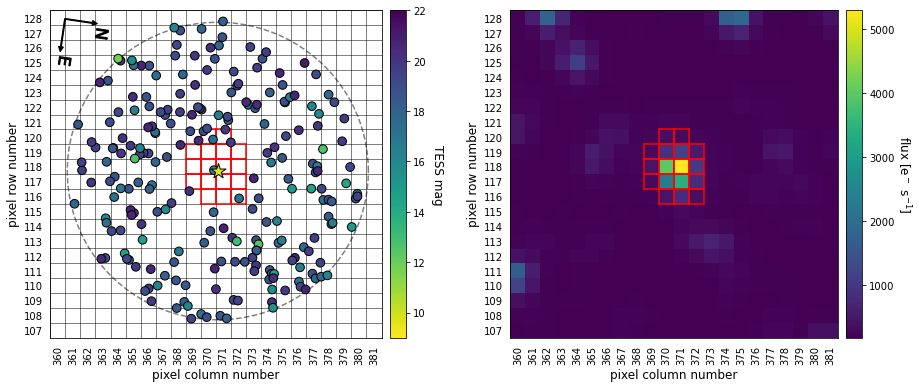

Sector 11


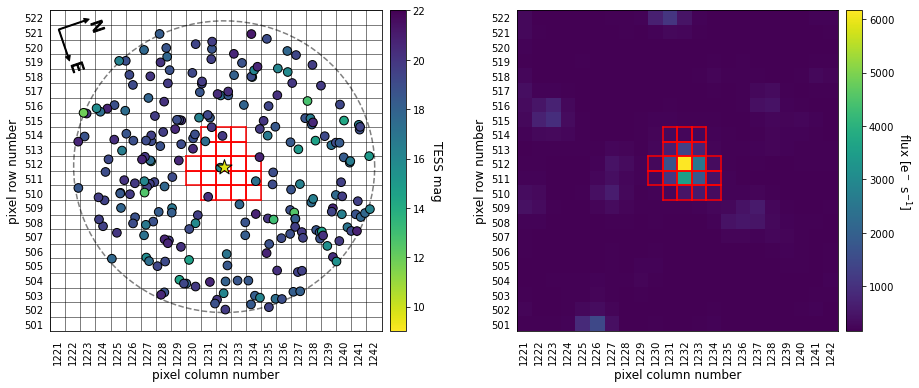

Sector 12


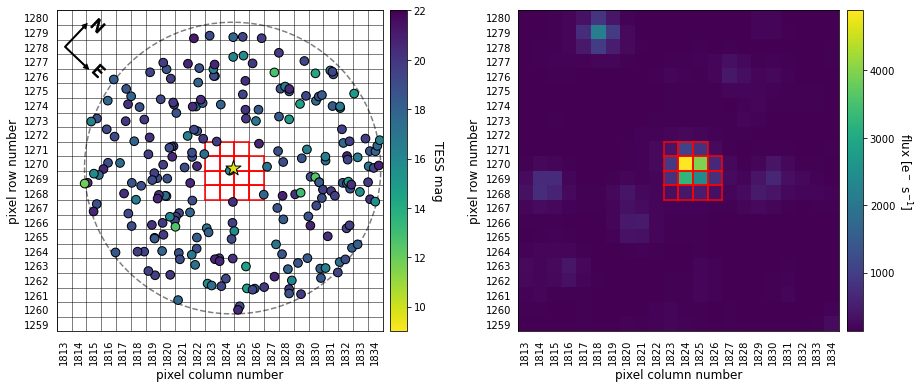

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,382626661,9.6768,9.001,8.554,8.517,118.569625,-65.441550,0.90,0.811062,5245.0,12.062900,0.000,0.000
1,382627409,15.8730,15.373,10.655,10.562,118.569364,-65.443039,NaN,NaN,NaN,NaN,5.374,184.171
2,382626664,17.4138,16.665,15.823,15.858,118.542549,-65.444751,1.00,0.753102,5640.0,0.291094,42.117,254.111
3,765150835,19.8474,NaN,NaN,NaN,118.542788,-65.437952,NaN,NaN,NaN,0.491111,42.195,287.864
4,382627414,17.1797,15.653,15.076,14.835,118.591003,-65.432329,NaN,NaN,NaN,NaN,46.104,43.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,765149736,18.4705,NaN,NaN,NaN,118.546287,-65.496003,0.98,0.581155,5557.0,-0.289193,199.109,190.080
224,765149900,19.3666,NaN,NaN,NaN,118.702711,-65.444759,NaN,NaN,NaN,0.679420,199.451,93.381
225,382626692,11.8631,10.403,9.584,9.350,118.483309,-65.483938,NaN,33.631500,3996.0,0.192667,199.844,220.181
226,765149762,17.6649,NaN,NaN,NaN,118.616585,-65.493765,0.98,1.055870,5575.0,-0.098146,200.652,159.545


In [4]:
ap10 = np.array([[370,116],[371,116],[372,116],[369,117],[370,117],[371,117],
                 [372,117],[369,118],[370,118],[371,118],[372,118],[369,119],
                 [370,119],[371,119],[372,119],[370,120],[371,120]])

ap11 = np.array([[1231,510],[1232,510],[1233,510],[1234,510],[1230,511],[1231,511],
                 [1232,511],[1233,511],[1234,511],[1230,512],[1231,512],[1232,512],
                 [1233,512],[1234,512],[1231,513],[1232,513],[1233,513],[1231,514],
                 [1232,514],[1233,514]])

ap12 = np.array([[1823,1268],[1824,1268],[1825,1268],[1826,1268],[1823,1269],
                 [1824,1269],[1825,1269],[1826,1269],[1823,1270],[1824,1270],
                 [1825,1270],[1826,1270],[1823,1271],[1824,1271],[1825,1271]])

apertures = np.array([ap10, ap11, ap12])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,382626661,9.6768,9.001,8.554,8.517,118.569625,-65.441550,0.90,0.811062,5245.0,12.062900,0.000,0.000,9.948873e-01,0.000602
1,382627409,15.8730,15.373,10.655,10.562,118.569364,-65.443039,NaN,NaN,NaN,NaN,5.374,184.171,3.303626e-03,0.181434
2,382626664,17.4138,16.665,15.823,15.858,118.542549,-65.444751,1.00,0.753102,5640.0,0.291094,42.117,254.111,4.758119e-04,0.000000
3,765150835,19.8474,NaN,NaN,NaN,118.542788,-65.437952,NaN,NaN,NaN,0.491111,42.195,287.864,5.168972e-05,0.000000
4,382627414,17.1797,15.653,15.076,14.835,118.591003,-65.432329,NaN,NaN,NaN,NaN,46.104,43.951,4.983910e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,765149736,18.4705,NaN,NaN,NaN,118.546287,-65.496003,0.98,0.581155,5557.0,-0.289193,199.109,190.080,7.809715e-26,0.000000
224,765149900,19.3666,NaN,NaN,NaN,118.702711,-65.444759,NaN,NaN,NaN,0.679420,199.451,93.381,1.355548e-26,0.000000
225,382626692,11.8631,10.403,9.584,9.350,118.483309,-65.483938,NaN,33.631500,3996.0,0.192667,199.844,220.181,1.075172e-24,0.000000
226,765149762,17.6649,NaN,NaN,NaN,118.616585,-65.493765,0.98,1.055870,5575.0,-0.098146,200.652,159.545,1.290445e-25,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

1 382627409


In [7]:
target.stars['tdepth'][1] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_5584\63419669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][1] = 0


# Ploting CC File

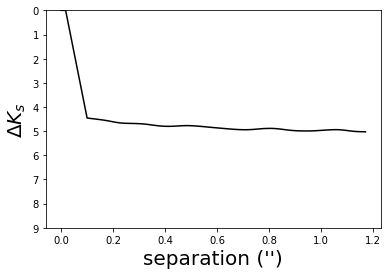

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 609 ms
Wall time: 608 ms


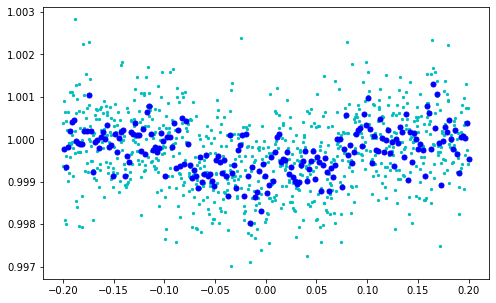

In [9]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 382626661.
Calculating EB and EBx2P scenario probabilities for 382626661.
Calculating PTP scenario probability for 382626661.
Calculating PEB and PEBx2P scenario probabilities for 382626661.
Calculating STP scenario probability for 382626661.
Calculating SEB and SEBx2P scenario probabilities for 382626661.
Calculating DTP scenario probability for 382626661.
Calculating DEB and DEBx2P scenario probabilities for 382626661.
Calculating BTP scenario probability for 382626661.
Calculating BEB and BEBx2P scenario probabilities for 382626661.
FPP =  0.0001287083681341672
NFPP =  0.0
Calculating TP scenario probabilitiey for 382626661.
Calculating EB and EBx2P scenario probabilities for 382626661.
Calculating PTP scenario probability for 382626661.
Calculating PEB and PEBx2P scenario probabilities for 382626661.
Calculating STP scenario probability for 382626661.
Calculating SEB and SEBx2P scenario probabilities for 382626661.
Calculating DTP scenario 

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.00015162982224037336
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,382626661,TP,0.900000,0.811062,17.614643,89.818027,0.098249,0.106188,52.239689,2.235552,0.000000,0.000000,8.990366e-01
1,382626661,EB,0.900000,0.811062,17.614643,87.289506,1.956633,0.018786,53.602024,0.000000,0.811398,0.811062,5.986989e-35
2,382626661,EBx2P,0.900000,0.811062,35.229285,88.839692,0.769092,0.565266,157.714265,0.000000,0.896080,0.811062,9.519631e-23
3,382626661,PTP,0.900000,0.811062,17.614643,89.604026,0.261024,0.122747,289.644845,2.267189,0.000000,0.000000,5.908664e-02
4,382626661,PEB,0.900000,0.811062,17.614643,83.089346,1.149247,0.773779,86.763971,0.000000,0.833033,0.811062,1.149759e-33
5,382626661,PEBx2P,0.900000,0.811062,35.229285,88.613811,0.587759,0.874068,203.113370,0.000000,0.883882,0.811062,3.749665e-24
6,382626661,STP,0.868756,0.811062,17.614643,89.732826,0.241658,0.602519,257.413981,3.319589,0.000000,0.000000,9.464219e-05
7,382626661,SEB,0.294628,0.313281,17.614643,89.529417,0.177217,0.803998,176.403930,0.000000,0.055588,0.100000,8.914431e-07
8,382626661,SEBx2P,0.108311,0.131623,35.229285,89.949564,0.099470,0.694469,184.953500,0.000000,0.104638,0.126566,8.950409e-08
9,382626661,DTP,0.900000,0.811062,17.614643,89.697481,0.197671,0.118460,295.586626,2.242942,0.000000,0.000000,4.172517e-02


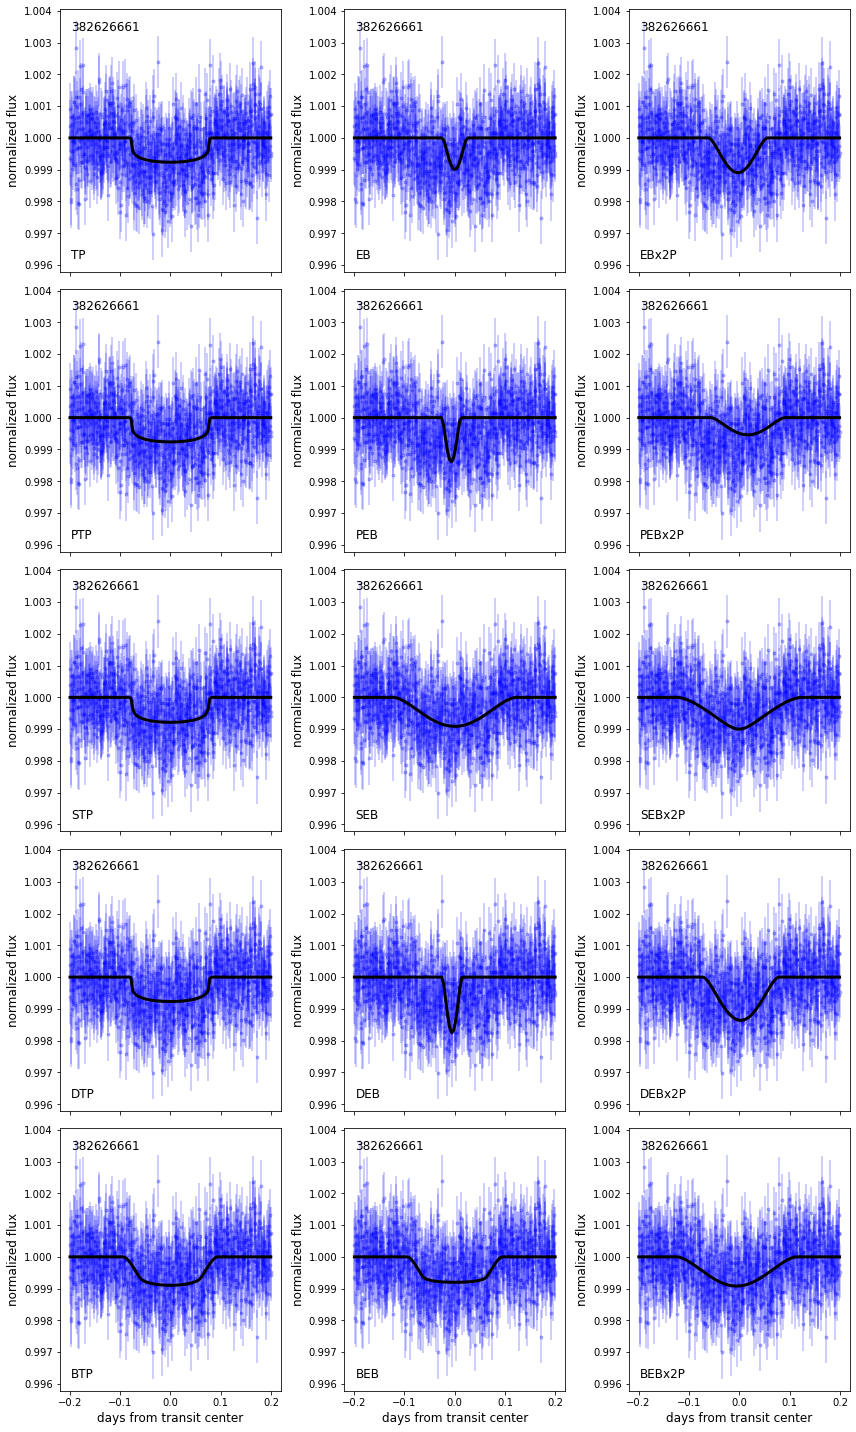

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [13]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.0001287083681341672 ,
0.00017251249887806352 ,
0.00010819578028065102 ,
0.0001810268145874261 ,
0.00021667184269336115 ,
0.0001326015767924016 ,
0.0002139072125032504 ,
0.00020254986760281923 ,
0.00025178071502318655 ,
0.000145548763050507 ,
0.0003651945476831342 ,
7.064361604591785e-05 ,
0.0001771834806995054 ,
0.0001689915455973523 ,
0.00015539389130636572 ,
0.0001770651241168597 ,
0.00017548078714790805 ,
0.0001339886699117665 ,
0.00015452211391075998 ,
0.00015162982224037336 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


## Running with new band info and cc file

In [14]:
ID = 382626661
sectors = np.array([10,11,12])

period = 17.6146427422
tdepth = 0.0005993900054552719

lc_file = "TOI_283_S10_11_12.csv"
contrastcurve_file = "TOI_283_832nm.csv"

band = 'TESS'

CPU times: total: 578 ms
Wall time: 573 ms


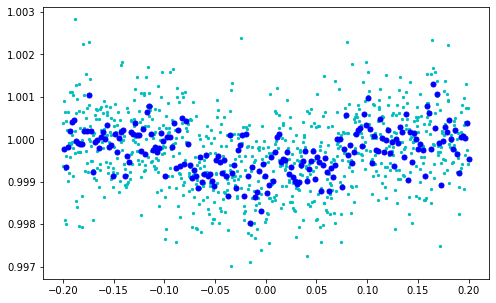

In [15]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [16]:
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 382626661.
Calculating EB and EBx2P scenario probabilities for 382626661.
Calculating PTP scenario probability for 382626661.
Calculating PEB and PEBx2P scenario probabilities for 382626661.
Calculating STP scenario probability for 382626661.
Calculating SEB and SEBx2P scenario probabilities for 382626661.
Calculating DTP scenario probability for 382626661.
Calculating DEB and DEBx2P scenario probabilities for 382626661.
Calculating BTP scenario probability for 382626661.
Calculating BEB and BEBx2P scenario probabilities for 382626661.
FPP =  0.00010884185501880417
NFPP =  0.0
Calculating TP scenario probabilitiey for 382626661.
Calculating EB and EBx2P scenario probabilities for 382626661.
Calculating PTP scenario probability for 382626661.
Calculating PEB and PEBx2P scenario probabilities for 382626661.
Calculating STP scenario probability for 382626661.
Calculating SEB and SEBx2P scenario probabilities for 382626661.
Calculating DTP scenario

In [17]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.0001088261656593259
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,382626661,TP,0.900000,0.811062,17.614643,89.779887,0.110669,0.156787,71.095316,2.255550,0.000000,0.000000,9.311428e-01
1,382626661,EB,0.900000,0.811062,17.614643,86.872989,1.519906,0.342955,83.654750,0.000000,0.851264,0.811062,1.108313e-34
2,382626661,EBx2P,0.900000,0.811062,35.229285,89.080048,0.281144,0.873683,185.609661,0.000000,0.887196,0.811062,2.603909e-10
3,382626661,PTP,0.900000,0.811062,17.614643,89.863869,0.077979,0.074689,21.661647,2.278627,0.000000,0.000000,3.129227e-02
4,382626661,PEB,0.900000,0.811062,17.614643,87.207430,1.779588,0.133302,77.879456,0.000000,0.813592,0.811062,4.279684e-35
5,382626661,PEBx2P,0.900000,0.811062,35.229285,89.095037,0.171108,0.923268,184.976924,0.000000,0.876483,0.811062,3.743006e-11
6,382626661,STP,0.895403,0.811062,17.614643,89.424516,0.211640,0.380597,100.685907,3.197189,0.000000,0.000000,8.744433e-05
7,382626661,SEB,0.127828,0.156565,17.614643,89.900456,0.087540,0.713459,185.556500,0.000000,0.016891,0.100000,1.299607e-07
8,382626661,SEBx2P,0.140050,0.170733,35.229285,89.664822,0.145200,0.896618,156.297836,0.000000,0.134758,0.164722,8.042978e-07
9,382626661,DTP,0.900000,0.811062,17.614643,89.725424,0.131747,0.192420,77.600801,2.269839,0.000000,0.000000,3.745612e-02


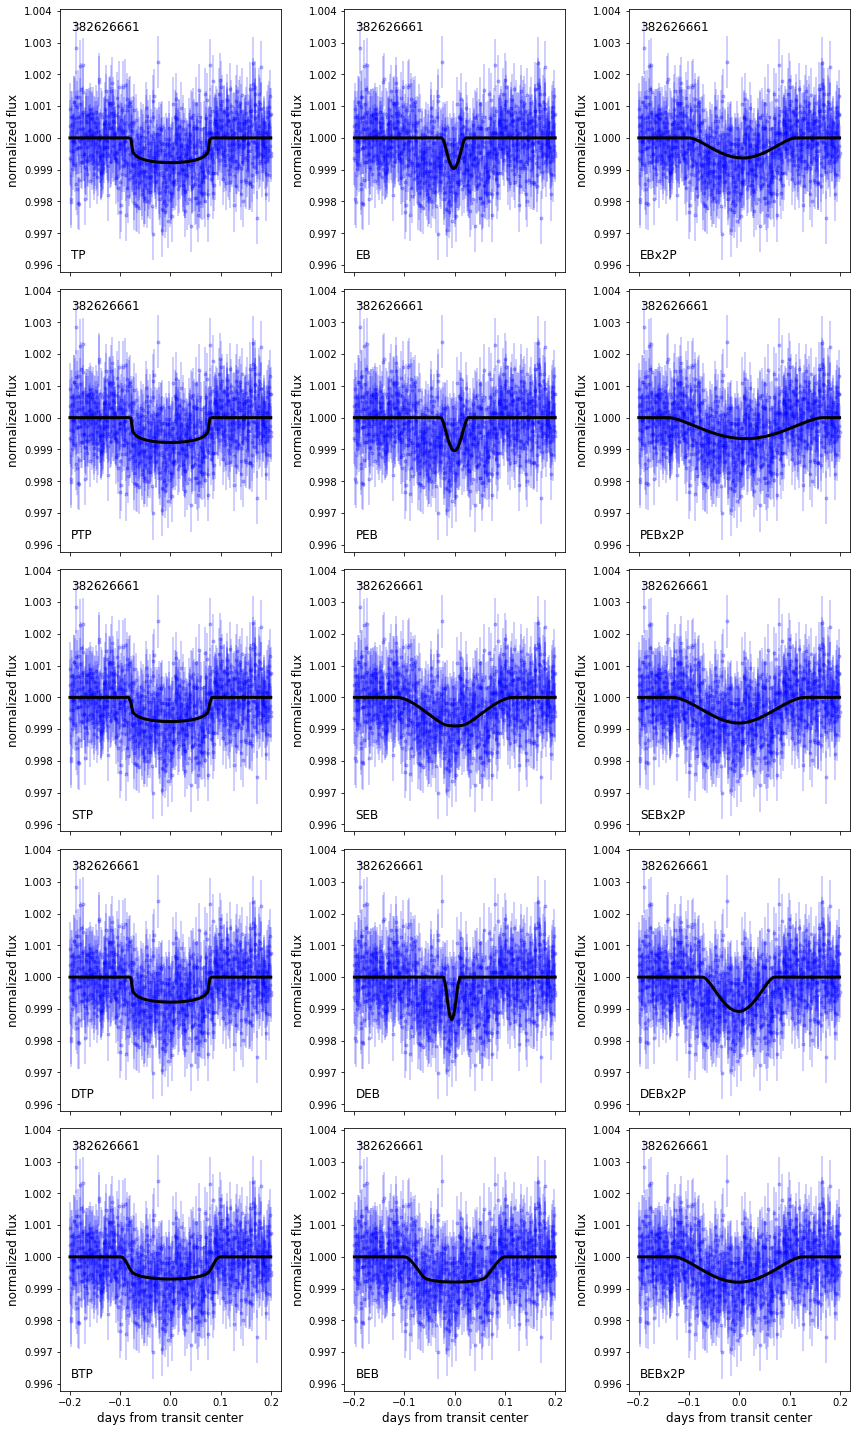

In [18]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [19]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.00010884185501880417 ,
0.0001567458589276649 ,
7.749669500378698e-05 ,
9.265289813564781e-05 ,
0.00013650013203836409 ,
7.536967315813214e-05 ,
0.00020519055713341672 ,
0.00018684133442647965 ,
8.880634172281354e-05 ,
0.00012439737892389058 ,
0.00012244273497985514 ,
0.00012639313333806523 ,
0.00017607828357979471 ,
0.00012396383834045732 ,
0.00015245207434455565 ,
8.666062240936245e-05 ,
0.0001242363142959224 ,
0.00011176008076596577 ,
0.00014154824992540505 ,
0.0001088261656593259 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


### Results logging

In [20]:
##Vis 562nmm

fpp=np.array([0.0001287083681341672 ,
0.00017251249887806352 ,
0.00010819578028065102 ,
0.0001810268145874261 ,
0.00021667184269336115 ,
0.0001326015767924016 ,
0.0002139072125032504 ,
0.00020254986760281923 ,
0.00025178071502318655 ,
0.000145548763050507 ,
0.0003651945476831342 ,
7.064361604591785e-05 ,
0.0001771834806995054 ,
0.0001689915455973523 ,
0.00015539389130636572 ,
0.0001770651241168597 ,
0.00017548078714790805 ,
0.0001339886699117665 ,
0.00015452211391075998 ,
0.00015162982224037336])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.00017417985191028884 +/- 5.888369406281703e-05
0.0 +/- 0.0


In [21]:
##Tess 832nmm

fpp=np.array([0.00010884185501880417 ,
0.0001567458589276649 ,
7.749669500378698e-05 ,
9.265289813564781e-05 ,
0.00013650013203836409 ,
7.536967315813214e-05 ,
0.00020519055713341672 ,
0.00018684133442647965 ,
8.880634172281354e-05 ,
0.00012439737892389058 ,
0.00012244273497985514 ,
0.00012639313333806523 ,
0.00017607828357979471 ,
0.00012396383834045732 ,
0.00015245207434455565 ,
8.666062240936245e-05 ,
0.0001242363142959224 ,
0.00011176008076596577 ,
0.00014154824992540505 ,
0.0001088261656593259])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.00012636021110638552 +/- 3.482011543276422e-05
0.0 +/- 0.0
